<a href="https://colab.research.google.com/github/BayyaChinnu4202/DEEP-LEARNING-LAB2/blob/main/DEEP_LEARNING_LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test,maxlen=maxlen)

In [4]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(maxlen,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5010 - loss: 436.1660 - val_accuracy: 0.5042 - val_loss: 1.7513
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5013 - loss: 15.9888 - val_accuracy: 0.5000 - val_loss: 0.7056
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4954 - loss: 3.7744 - val_accuracy: 0.5032 - val_loss: 0.6998
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5049 - loss: 2.0326 - val_accuracy: 0.5018 - val_loss: 0.7091
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5050 - loss: 1.5210 - val_accuracy: 0.5000 - val_loss: 0.6945
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4935 - loss: 1.1638 - val_accuracy: 0.5000 - val_loss: 0.6955
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4991 - loss: 0.9704 - val_accuracy: 0.5027 - val_loss: 0.6934
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5038 - loss: 0.9174 - val_accuracy:

In [7]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy:%.2f%%" % (scores[1]*100))

Accuracy:50.08%


In [8]:
from sklearn.metrics import classification_report
y_pred = (model.predict(x_test)>0.5).astype("int32")
print(classification_report(y_test,y_pred,target_names=["Negative","Positive"]))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

    Negative       0.50      1.00      0.67     12500
    Positive       0.57      0.01      0.01     12500

    accuracy                           0.50     25000
   macro avg       0.54      0.50      0.34     25000
weighted avg       0.54      0.50      0.34     25000



In [9]:
cm = confusion_matrix(y_test, y_pred)

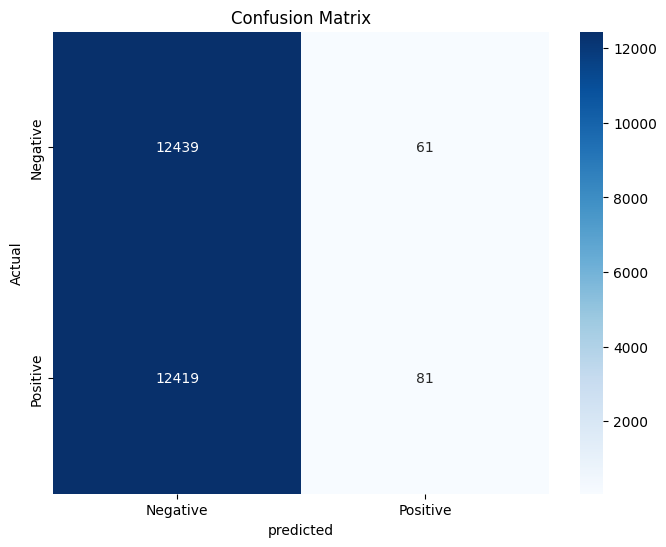

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"],yticklabels=["Negative","Positive"])
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()